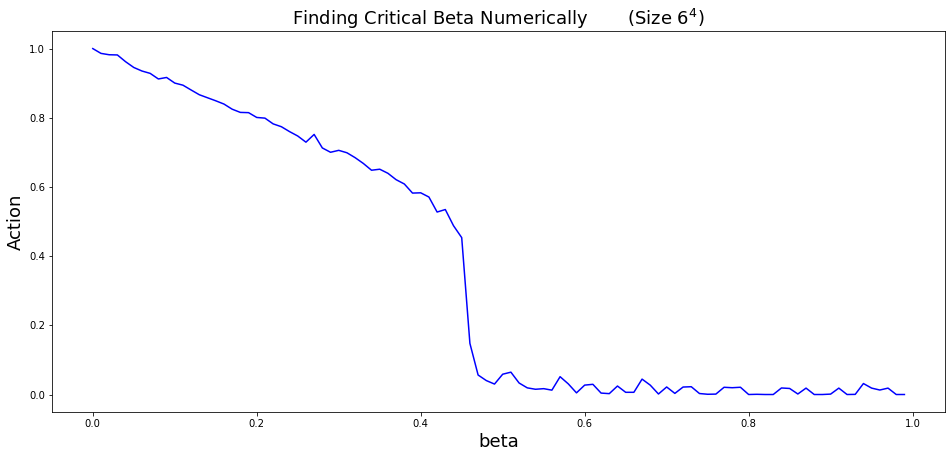

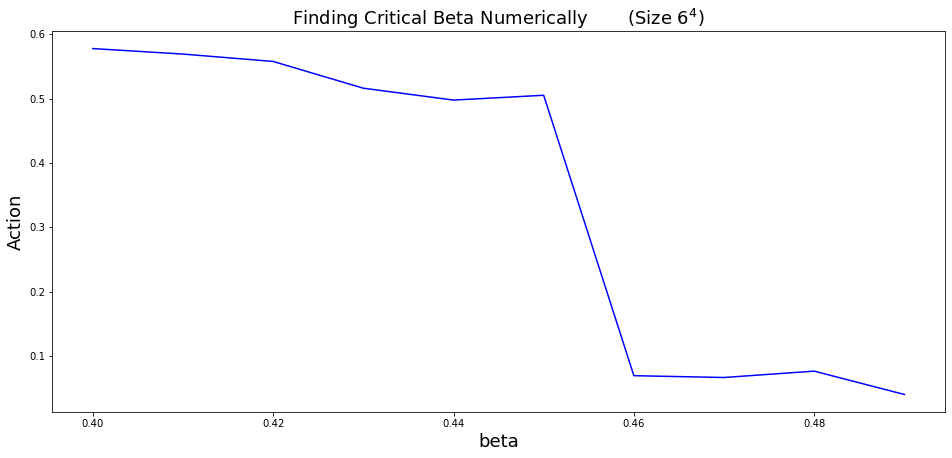

In [10]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

N = 6
latt = np.ones(N**4*4).reshape([N, N, N, N, 4])

rng = np.random.default_rng()


# utility
def moveup(xvec, d):
    #  xvec is mutable
    xvec[d] += 1
    xvec[d] = xvec[d] % N   # stays between [0, 1, ..., N-1]
    return None


def movedown(xvec, d):
    #  xvec is mutable
    xvec[d] -= 1
    xvec[d] = xvec[d] % N
    return None


def coldstart():
    latt[:] = 1
    return None


def randomstart():

    sites = itertools.product(range(N), range(N), range(N), range(N), range(4))

    for site in sites:

        spin = rng.integers(2)
        if spin == 0:
            spin = -1

        latt[site] = spin

    return None


def update(beta):

    sites = itertools.product(range(N), range(N), range(N), range(N), range(4))

    action = 0.

    for site in sites:

        *x, d = site

        # following M. Creutz
        # staples around link(1->4)
        #    dperp        6--5
        #    ^            |  |
        #    |            1--4
        #    |            |  |
        #    -----> d     2--3

        staplesum = 0.
        for dperp in range(4):
            if dperp != d:

                # plaquette 1234
                movedown(x, dperp)
                staple = latt[x[0], x[1], x[2], x[3], dperp]
                staple *= latt[x[0], x[1], x[2], x[3], d]
                moveup(x, d)
                staple *= latt[x[0], x[1], x[2], x[3], dperp]
                moveup(x, dperp)
                staplesum += staple

                # plaquette 4561
                staple = latt[x[0], x[1], x[2], x[3], dperp]
                moveup(x, dperp)
                movedown(x, d)
                staple *= latt[x[0], x[1], x[2], x[3], d]
                movedown(x, dperp)
                staple *= latt[x[0], x[1], x[2], x[3], dperp]
                staplesum += staple

                # # upper part:
                # moveup(x, d)
                # link1 = latt[x[0], x[1], x[2], x[3], dperp]
                # moveup(x, dperp)
                # movedown(x, d)
                # link2 = latt[x[0], x[1], x[2], x[3], d]
                # movedown(x, dperp)  # back to 0
                # link3 = latt[x[0], x[1], x[2], x[3], dperp]
                # staplesum += link1 * link2 * link3

                # # lower part:
                # moveup(x, d)
                # movedown(x, dperp)
                # link4 = latt[x[0], x[1], x[2], x[3], dperp]
                # movedown(x, d)
                # link5 = latt[x[0], x[1], x[2], x[3], d]
                # link6 = latt[x[0], x[1], x[2], x[3], dperp]
                # moveup(x, dperp)
                # staplesum += link4 * link5 * link6


        # calculate the Boltzmann weight
        bplus = np.exp(beta*staplesum)
        bminus = np.exp(-beta*staplesum)
        bplus = bplus/(bplus+bminus)

        # the heatbath algorithm
        r = rng.uniform()

        if r < bplus:
            latt[site] = 1
            action += staplesum
        else:
            latt[site] = -1
            action -= staplesum

    return 1. - action/N**4/4./6.



def main(beta_arr):
    coldstart()
    randomstart()
    randomstart()
    randomstart()
    actionn = np.zeros(len(beta_arr))
    for i, beta  in enumerate(beta_arr):
        action = update(beta)
        actionn[i] = action
    return actionn





def coexi_cold(beta_arr):
    beta_arrcold = np.ones(100)
    action_cold = np.zeros(len(beta_arr))
    for i, betavalu  in enumerate(beta_arr):
        action = main(beta_arrcold*betavalu)
        action_cold[i] = action[-1:]
    return action_cold



Bs = np.arange(0.,1. , 0.01)
cold_co = coexi_cold(Bs)

plt.subplots(figsize=(16, 7))
plt.plot(Bs,cold_co, color='blue')
plt.xlabel("beta", fontsize=18)
plt.ylabel("Action", fontsize=18)
plt.title("Finding Critical Beta Numerically       (Size $%.f^4$)"%(N), fontsize=18)
plt.show()


Bs1 = np.arange(0.4,0.5 , 0.01)
cold_co1 = coexi_cold(Bs1)

plt.subplots(figsize=(16, 7))
plt.plot(Bs1,cold_co1, color='blue')
plt.xlabel("beta", fontsize=18)
plt.ylabel("Action", fontsize=18)
plt.title("Finding Critical Beta Numerically       (Size $%.f^4$)"%(N), fontsize=18)
plt.show()